What is the most used type of card on avg?

How many players using x number of spells win on avg?

How many players using x number of towers, x number of spawners win

What rarity has the highest wr? Percentage of deck rarity in higher trophies

Need to go through each deck in data_ord and put in names/elixir cost for each id, replace maybe

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import defaultdict
from collections import Counter
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [4]:
data_games = pd.read_csv(".\data_ord.csv")
data_card_list = pd.read_csv(".\cardlist.csv")

print(data_games.head())
print(data_card_list.head())

   Unnamed: 0  p1card1  p1card2  p1card3  p1card4  p1card5  p1card6  p1card7  \
0           0        8       34       37       52       69       88       92   
1           1        8       34       37       52       69       88       92   
2           2        8       34       37       52       69       88       92   
3           3        8       34       37       52       69       88       92   
4           4       25       31       59       68       77       98      101   

   p1card8  p2card1  p2card2  p2card3  p2card4  p2card5  p2card6  p2card7  \
0       97       11       12       13       58       77       86       87   
1       97       11       37       53       83       88       92       97   
2       97       19       22       25       32       54       76       87   
3       97       28       38       43       46       50       81      102   
4      105       23       34       39       73       85       94       98   

   p2card8  p1trophies  p2trophies  outcome  
0       98

In [5]:
named_deck = pd.DataFrame(data_games)

# print(named_deck)
named_deck.drop('Unnamed: 0', axis=1, inplace=True)
named_deck.head()

# barb_deck = named_deck[named_deck['p1card1'] == 8]
# barb_deck['p1card1'] = data_cards.loc[8]['cost']
# # print(barb_deck)

# for card in range(0, len(data_cards)):
#     # named_deck[named_deck['p1card1'] == card]
#     named_deck[named_deck['p1card1'] == card]['p1card1'] = data_cards.loc[card]['cost']
#     # deck

# barb_deck
# named_deck

,p1card1,p1card2,p1card3,p1card4,p1card5,p1card6,p1card7,p1card8,p2card1,p2card2,p2card3,p2card4,p2card5,p2card6,p2card7,p2card8,p1trophies,p2trophies,outcome
0,8,34,37,52,69,88,92,97,11,12,13,58,77,86,87,98,7578,7597,1
1,8,34,37,52,69,88,92,97,11,37,53,83,88,92,97,102,7548,7551,1
2,8,34,37,52,69,88,92,97,19,22,25,32,54,76,87,98,7518,7523,1
3,8,34,37,52,69,88,92,97,28,38,43,46,50,81,102,103,7485,7523,1
4,25,31,59,68,77,98,101,105,23,34,39,73,85,94,98,99,7126,7114,1


In [6]:
# Card Section

cards_winning = {}
cards_winning = defaultdict(lambda:0, cards_winning)
cards_general = {}
cards_general = defaultdict(lambda: 0, cards_general)
most_common = 0 
maximum = 0 

def get_card_occurence(cards_used, outcome): 
    global card_general
    global cards_winning
    i = 0 
    for card in cards_used:
        cards_general[card] = cards_general[card] + 1
        if outcome == 1 and i < 8:
            cards_winning[card] = cards_winning[card] + 1
        elif outcome == 2 and i >= 8: 
            cards_winning[card] = cards_winning[card] + 1
        i = i+1
    
lst = []
data_games.apply(lambda x: get_card_occurence([x["p1card1"],x["p1card2"],x["p1card3"],x["p1card4"],x["p1card5"],x["p1card6"],x["p1card7"],x["p1card8"],x["p2card1"],x["p2card2"],x["p2card3"],x["p2card4"],x["p2card5"],x["p2card6"],x["p2card7"],x["p2card8"]],x["outcome"]), axis=1)

data_cards = pd.DataFrame.from_dict([cards_general]).transpose().reset_index()
data_cards

,index,0
0,8,45795
1,34,66651
2,37,215819
3,52,45047
4,69,62900
...,...,...
101,79,5542
102,24,53761
103,61,37426
104,100,23811


In [7]:
temp_df = data_cards
temp_df.rename(columns={0: 'occurrences', 'index': 'card'}, inplace=True)

wins_df = pd.DataFrame.from_dict([cards_winning]).transpose().reset_index()
wins_df.rename(columns={0: 'wins', 'index': 'card'}, inplace=True)
# wins_df.sort_values(by=['wins'], inplace=True, ascending=False)
wins_df

,card,wins
0,8,22983
1,34,35229
2,37,111319
3,52,23700
4,69,31949
...,...,...
101,47,20527
102,18,66530
103,100,11435
104,79,2746


In [8]:
temp_df.sort_values(by=['occurrences'], inplace=True, ascending=False)

wins_df = wins_df.merge(right=temp_df)
wins_df.sort_values(by=['wins'], inplace=True, ascending=False)

wins_df

,card,wins,occurrences
31,87,226342,452233
13,98,219010,441936
32,95,193913,389347
30,42,152439,299980
16,11,150391,314353
...,...,...,...
62,81,7731,15325
87,2,7270,14658
67,28,6494,12503
105,67,6420,13071


Why is Barb hut winrate over 50%? 

In [9]:
winrate_df = wins_df

for index, row in winrate_df.iterrows():    
    winrate_df.at[index, 'winrate'] = row['wins'] / row['occurrences']

winrate_df.sort_values(by=['winrate'], inplace=True, ascending=False)
winrate_df

,card,wins,occurrences,winrate
54,54,32352,61037,0.530039
98,70,22406,42334,0.529267
1,34,35229,66651,0.528559
21,102,131432,249380,0.527035
84,29,39698,75386,0.526596
...,...,...,...,...
86,20,13481,28556,0.472090
63,64,55273,117924,0.468717
85,7,39768,86820,0.458051
66,17,45181,104706,0.431503


Why are all the winrate between .53 and .59?

In [10]:
change_card_df = winrate_df

# print(data_card_list.at[17, 'card'])

for index, row in change_card_df.iterrows():
    # print(row['card'])
    tup = (data_card_list.at[row['card'], 'card'], data_card_list.at[row['card'], 'cost'], data_card_list.at[row['card'], 'rarity'], data_card_list.at[row['card'], 'type'])
    # print(tup)
    change_card_df.at[index, 'card_name'] = tup[0]
    change_card_df.at[index, 'cost'] = tup[1]
    change_card_df.at[index, 'rarity'] = tup[2]
    change_card_df.at[index, 'type'] = tup[3]

change_card_df

,card,wins,occurrences,winrate,card_name,cost,rarity,type
54,54,32352,61037,0.530039,Cannon Cart,5.0,epic,unit
98,70,22406,42334,0.529267,Skeleton Dragons,4.0,common,unit
1,34,35229,66651,0.528559,Bowler,5.0,epic,unit
21,102,131432,249380,0.527035,Barbarian Barrel,2.0,epic,spell
84,29,39698,75386,0.526596,Lava Hound,7.0,legendary,unit
...,...,...,...,...,...,...,...,...
86,20,13481,28556,0.472090,Giant Skeleton,6.0,epic,unit
63,64,55273,117924,0.468717,Firecracker,3.0,common,unit
85,7,39768,86820,0.458051,Witch,5.0,epic,unit
66,17,45181,104706,0.431503,Wizard,5.0,rare,unit


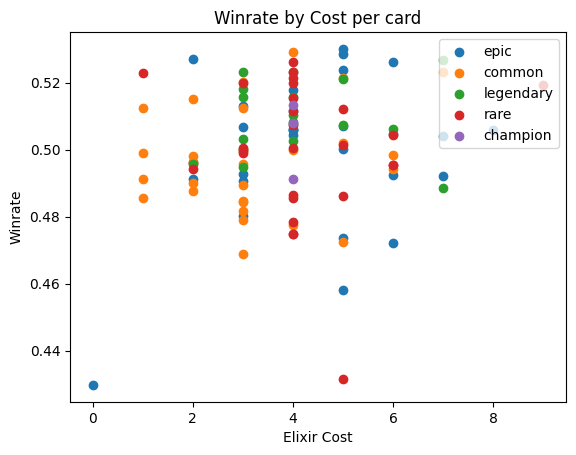

In [11]:
# make a scatter plot of winrate by elixir cost per card
for rarity in change_card_df['rarity'].unique():
    rarity_lst = change_card_df[change_card_df['rarity'] == rarity]

    # reg = LinearRegression()
    # x = np.array(rarity_lst['cost']).reshape(-1, 1)
    # y = np.array(rarity_lst['winrate']).reshape(-1, 1)
    # reg.fit(x, y)
    # y_exp = reg.predict(x)

    plt.scatter(rarity_lst['cost'], rarity_lst['winrate'], label=rarity)
    # plt.plot(x, y_exp)

    
plt.title('Winrate by Cost per card')
plt.xlabel('Elixir Cost')
plt.ylabel('Winrate')
plt.legend(loc='upper right')
plt.show()

Text(0.5, 1.0, 'Winrate over Rarity by Card')

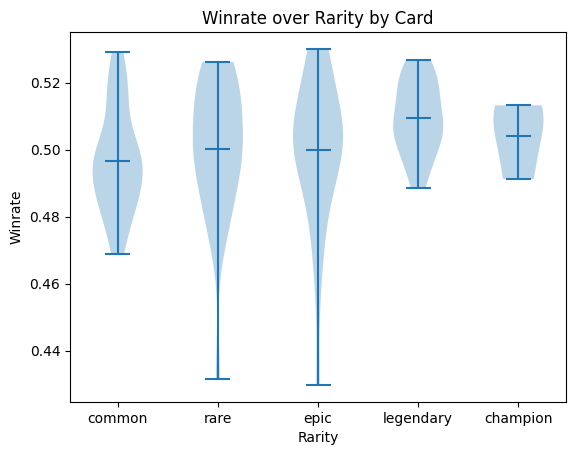

In [12]:
lst = []
# rarities = change_card_df['rarity'].unique()
rarities = ['common', 'rare', 'epic', 'legendary', 'champion']
for rarity in rarities:
    lst.append(change_card_df[change_card_df['rarity'] == rarity].winrate)
    
fig, ax = plt.subplots()
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(rarities)
ax.violinplot(lst, showmeans=True)
ax.set_xlabel('Rarity')
ax.set_ylabel('Winrate')
ax.set_title('Winrate over Rarity by Card')

Average winrate of legendaries is higher than the rest and has a smaller range meaning it's more consistent

Text(0.5, 1.0, 'Occurence over Rarity by Card')

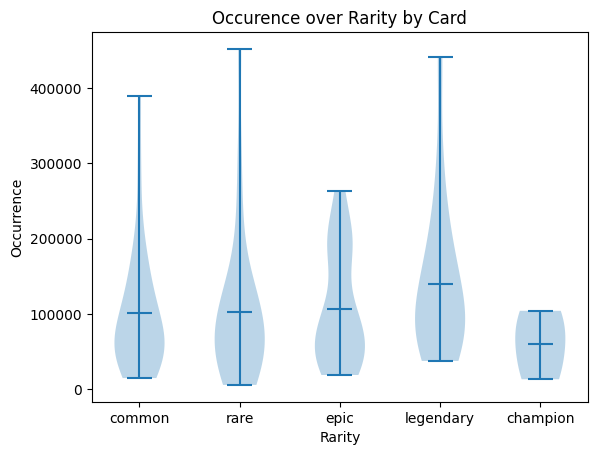

In [13]:
lst = []
# rarities = change_card_df['rarity'].unique()
rarities = ['common', 'rare', 'epic', 'legendary', 'champion']
for rarity in rarities:
    lst.append(change_card_df[change_card_df['rarity'] == rarity].occurrences)
    
fig, ax = plt.subplots()
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(rarities)
ax.violinplot(lst, showmeans=True)
ax.set_xlabel('Rarity')
ax.set_ylabel('Occurrence')
ax.set_title('Occurence over Rarity by Card')

Average occurence of legendary cards is higher than the rest, champion is less, more people don't use 

C:\Users\tanat\AppData\Local\Temp\ipykernel_12688\618998434.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.displot(data=change_card_df, x='cost', y='winrate', hue='rarity', kind='kde')


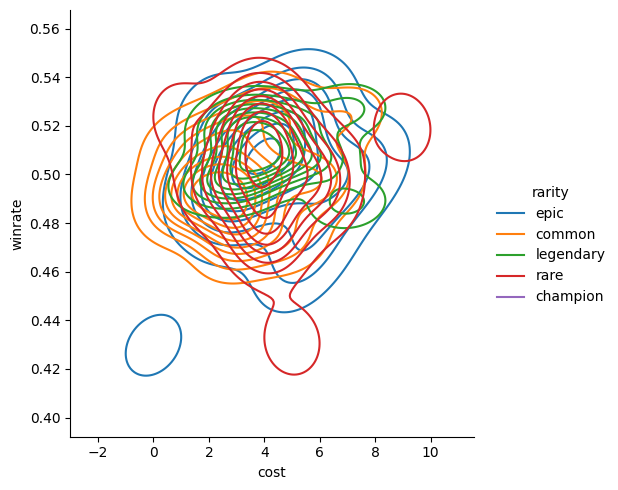

In [14]:
sns.displot(data=change_card_df, x='cost', y='winrate', hue='rarity', kind='kde')

### Hypothesis Testing

In [15]:
# No correlation between elixir cost and winrate
win_rate = change_card_df['winrate']
elixir_cost = change_card_df['rarity']

corr, p = pearsonr(win_rate, elixir_cost)
print('Pearsons correlation: %.3f' % corr)
print('Pearsons correlation pval: %e' % p)
corr, p = spearmanr(win_rate, elixir_cost)
print('Spearman correlation: %.3f' % corr)
print('Spearman correlation pval: %e' % p)

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U4')) -> None